# Codsoft-Data Science

# Task-4: SALES PREDICTION USING PYTHON

# Importing the Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Processing

In [5]:
#load dataset
sales=pd.read_csv("Advertisings.csv")

In [6]:
sales.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
#Number of rows and columns
sales.shape

(200, 4)

In [8]:
#Dataset Information
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
#check number of missing values
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
sales.columns.values.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

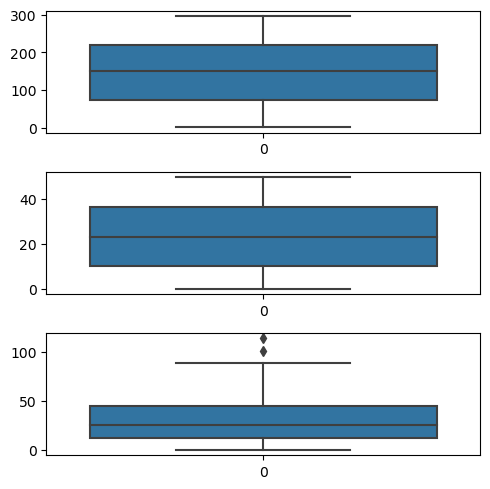

In [12]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(sales['TV'],ax=axs[0])
plt2=sns.boxplot(sales['Radio'],ax=axs[1])
plt3=sns.boxplot(sales['Newspaper'],ax=axs[2])
plt.tight_layout()

Text(0.5, 1.0, 'TV spent VS Sales')

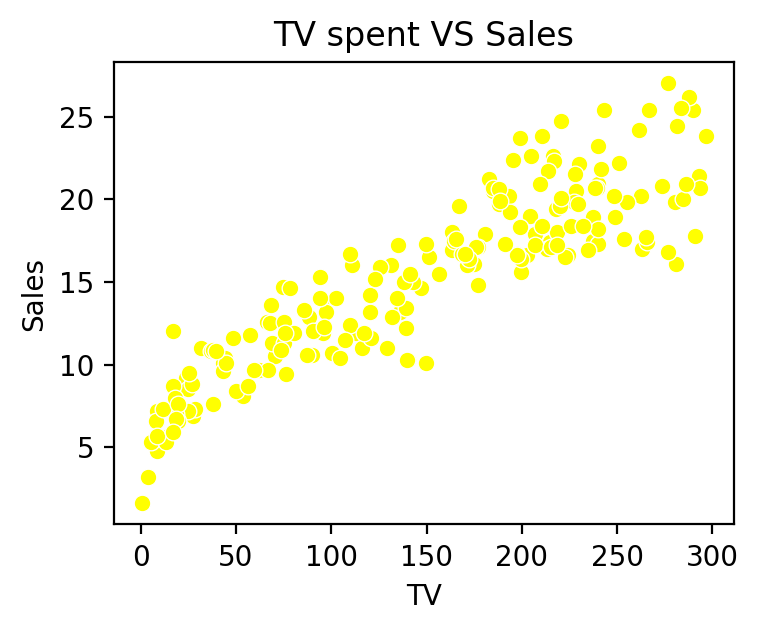

In [13]:
#Scatter Plot
plt.figure(figsize=(4,3),dpi=200)
sns.scatterplot(data=sales,x="TV",y="Sales",color='yellow')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV spent VS Sales")

Text(0.5, 1.0, 'Radio spent VS Sales')

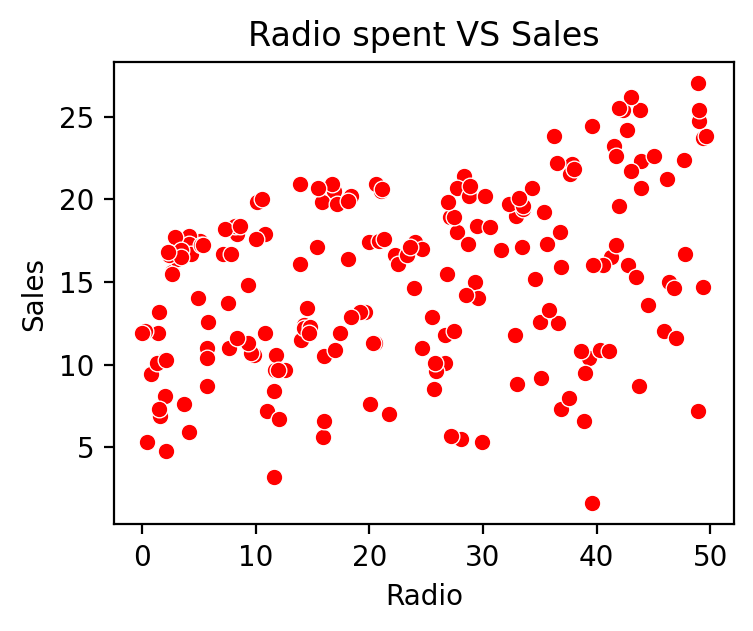

In [14]:
plt.figure(figsize=(4,3),dpi=200)
sns.scatterplot(data=sales,x="Radio",y="Sales",color='red')
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Radio spent VS Sales")

Text(0.5, 1.0, 'Newspaper spent VS Sales')

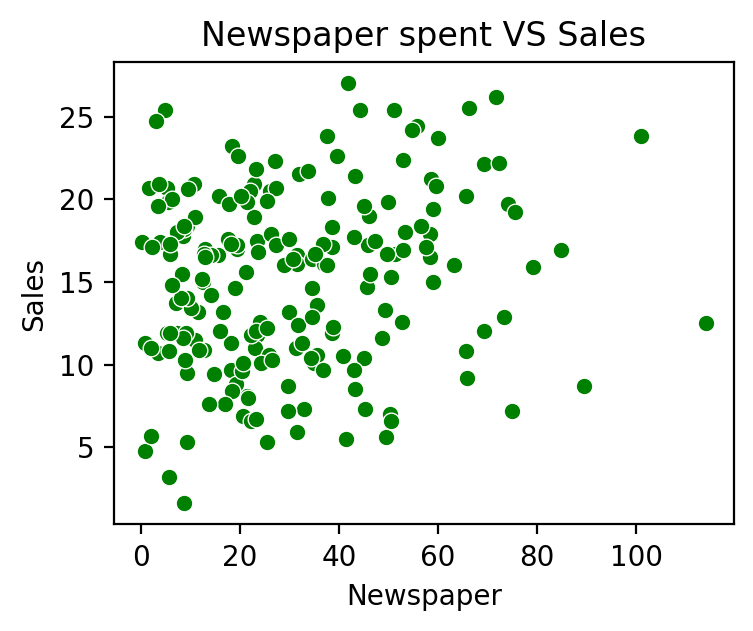

In [15]:
plt.figure(figsize=(4,3),dpi=200)
sns.scatterplot(data=sales,x="Newspaper",y="Sales",color='green')
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Newspaper spent VS Sales")

C:\Users\Varshini\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


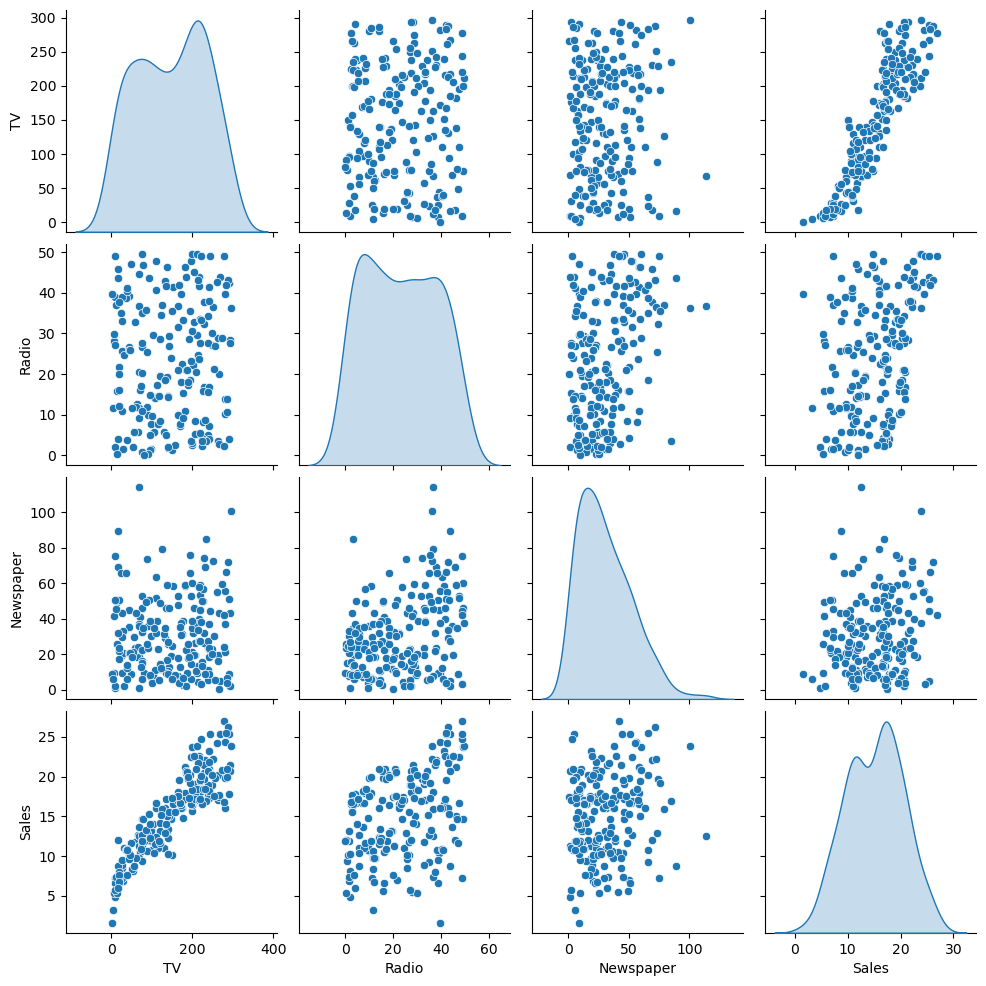

In [16]:
# creating a pair plot to visualize realtionship between all the columns at once
sns.pairplot(sales, diag_kind='kde')

<Axes: ylabel='Frequency'>

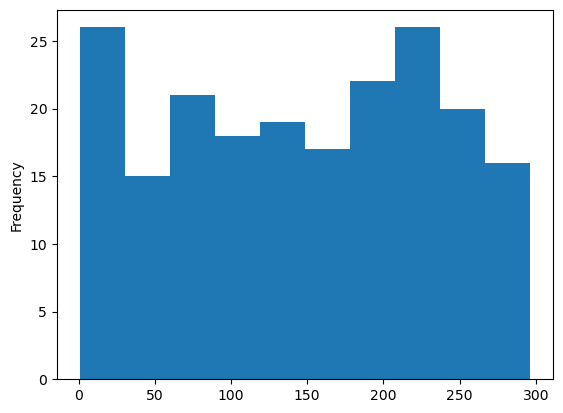

In [17]:
#Histogram
sales['TV'].plot.hist()

<Axes: xlabel='Radio', ylabel='Frequency'>

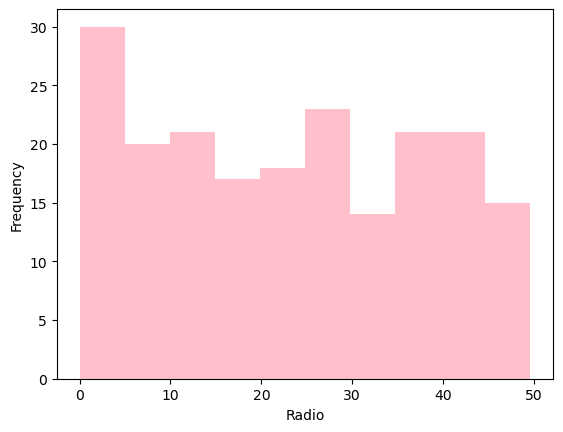

In [18]:
sales['Radio'].plot.hist(color='pink',xlabel='Radio')

<Axes: xlabel='Newspaper', ylabel='Frequency'>

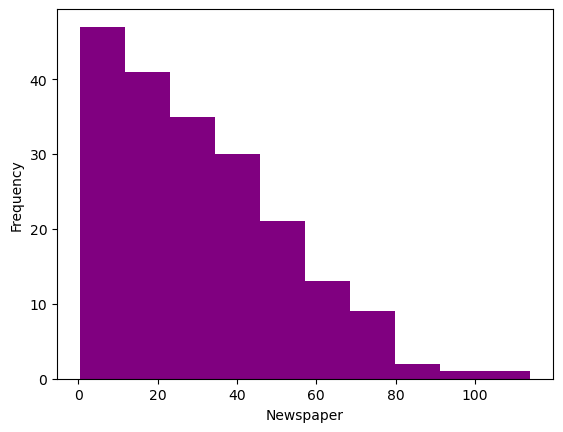

In [19]:
sales['Newspaper'].plot.hist(color='purple',xlabel='Newspaper')

Observation:
The majaority sales in the result of low advertising cost in newspaper

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


<Axes: >

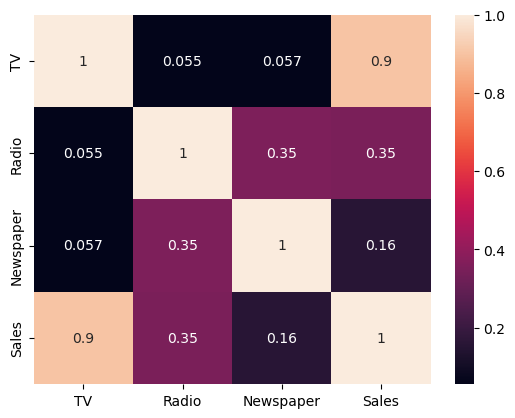

In [20]:
# checking for correlation
print(sales.corr())
sns.heatmap(sales.corr(),annot=True)

# Split the data into train and test data

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sales[['TV']],sales[['Sales']],test_size=0.3,random_state=0)

In [25]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(140, 1) (140, 1) (60, 1) (60, 1)


In [26]:
print(x_train)


        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [27]:
print(y_train)

     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [28]:
print(x_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [29]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    20.5
149   10.1
24     9.7
30    21.4
160   16.4
40    16.6
56     5.5


# Model Training

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)


In [89]:
print(y_pred)

[[-0.87429736  0.24110882 -0.70847507]
 [-0.10272323  0.19485293  0.71483756]
 [-1.62331779 -0.52541733  0.87507806]
 [ 0.76856203  0.00982938 -1.27402977]
 [-1.32655851 -1.33159138 -0.8121601 ]
 [-1.5758363   1.45697788  1.80353034]
 [-1.55684371 -0.14215426  0.91278171]
 [-0.50512881 -0.65096903 -0.94883582]
 [-1.40608999  0.04947728 -1.35886297]
 [-0.56091956  0.37987648 -1.06665971]
 [-1.62450483 -1.54965486 -0.25603132]
 [ 0.56557868 -1.34480735 -1.18448361]
 [-1.26958072  0.13538107 -0.49639207]
 [-0.96095107 -0.96154428 -1.42013139]
 [ 1.6149195  -0.65757701 -1.28816863]
 [-1.73133817 -0.80956064 -1.19390952]
 [-1.04048256 -0.7434808  -0.60007709]
 [-0.17513249  1.17944255  0.7006987 ]
 [ 0.25338791  1.04728287  0.31423633]
 [-0.71523438 -0.92189637  0.21997721]
 [ 1.50452505 -1.42410316 -0.34557748]
 [ 0.41482496  1.3248182  -1.38242775]
 [-0.53836585 -1.1994317   0.15870879]
 [ 0.75313054  0.04947728 -0.84515079]
 [-0.12408989 -1.43731913 -0.20890176]
 [ 1.59473987 -0.87564049

In [58]:
model.coef_

array([[ 1.00000000e+00, -9.27658409e-17, -8.42819794e-17],
       [-3.36710326e-16,  1.00000000e+00,  2.16746246e-16],
       [ 1.53050148e-16, -3.00616525e-17,  1.00000000e+00]])

In [32]:
model.intercept_

array([7.14382225])

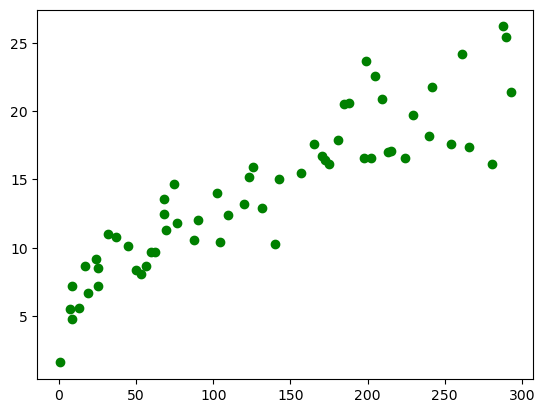

In [38]:
plt.scatter(x_test,y_test,color='g')

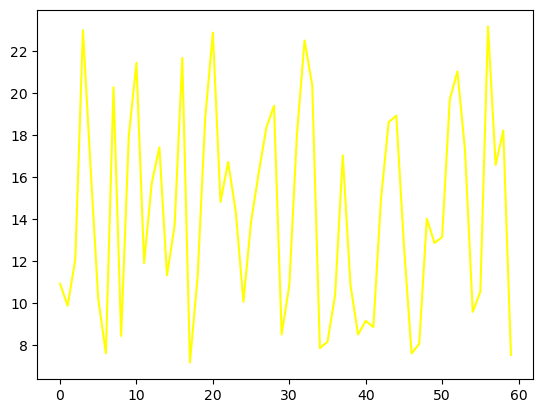

In [39]:
plt.plot(y_pred,color='yellow')

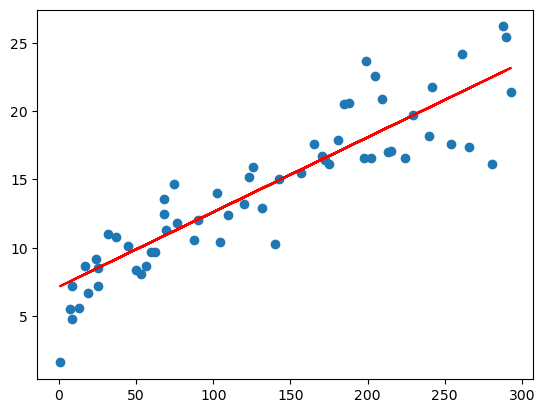

In [40]:
plt.scatter(x_test,y_test)
plt.plot(x_test,7.1438+0.0547*x_test,'r')
plt.show()